In [7]:
from agents import Agent, RandomAgent, HumanInput, EndAgent, RLAgent
from states import GameState, TOAD, FROG, BLANK
from game import run_game_loop, simulate_many_games, plot_losses

import random as rand
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import time


In [8]:
initial_position = [TOAD] * 2 + [BLANK] * 4 + [FROG] * 2
G = GameState(initial_position, starting_player=TOAD)

In [9]:
rl_agent = RLAgent(G, TOAD, batch_size=50)
random_agent = RandomAgent(G, FROG)

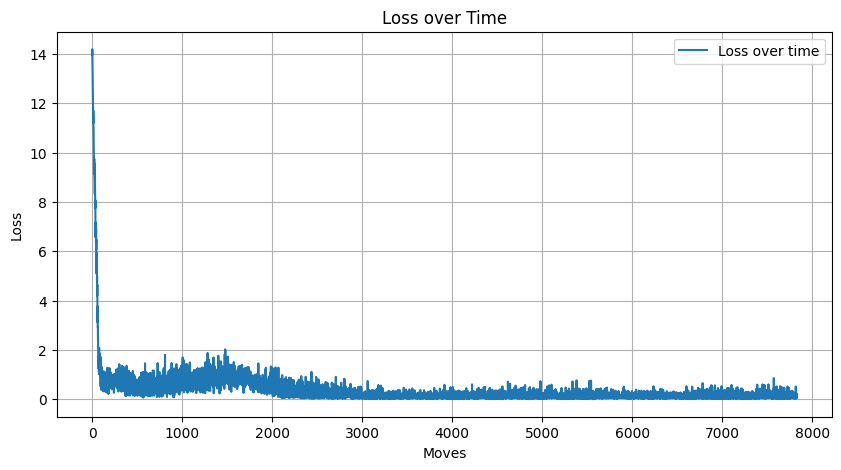

In [10]:
losses = rl_agent.train(opponent=random_agent, num_episodes=1000, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses)

Simulation took 2.87414 seconds
Toads won 492 games (49.2%)
Frogs won 508 games (50.8%)


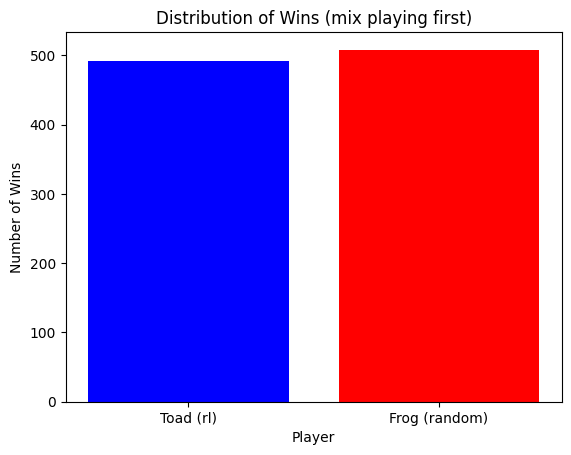

In [11]:
H = GameState(initial_position)
num_games = 1000
starting_player = 'mix'
tic = time.time()
results = simulate_many_games(num_games, H, rl_agent, random_agent,
                                starting_player=starting_player, verbose=False)
toc = time.time()
print(f'Simulation took {round(toc - tic, 5)} seconds')

# Count the number of wins for each player
t_wins = np.sum(results == TOAD)
f_wins = np.sum(results == FROG)
print(f"Toads won {t_wins} games ({round(t_wins / num_games * 100, 4)}%)")
print(f"Frogs won {f_wins} games ({round(f_wins / num_games * 100, 4)}%)")

# Plotting the results
plt.bar([f'Toad ({rl_agent.agent_name})', f'Frog ({random_agent.agent_name})'], [t_wins, f_wins], color=['blue', 'red'])
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title(f'Distribution of Wins ({starting_player} playing first)')
plt.show()

In [12]:
run_game_loop(G, rl_agent, random_agent, verbose=True)

Initializing game between rl as Toads and random as Frogs...
|T|T| | | | |F|F|
rl makes move 1
|T| |T| | | |F|F|
random makes move 1
|T| |T| | |F| |F|
rl makes move 1
|T| | |T| |F| |F|
random makes move 1
|T| | |T|F| | |F|
rl makes move 1
|T| | | |F|T| |F|
random makes move 2
|T| | | |F|T|F| |
rl makes move 2
| |T| | |F|T|F| |
random makes move 1
| |T| |F| |T|F| |
rl makes move 2
| | |T|F| |T|F| |
random makes move 1
| |F|T| | |T|F| |
rl makes move 2
| |F| |T| |T|F| |
random makes move 1
|F| | |T| |T|F| |
rl makes move 2
|F| | | |T|T|F| |
rl playing as Toads wins in 13 moves!


True